### Bike Sharing - Multiple linear regression assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_sharing = pd.DataFrame(pd.read_csv("day.csv"))

In [3]:
# dateset shape
bike_sharing.shape

(730, 16)

In [4]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# dataset info
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# missing and null value check 
bike_sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# removing the columns instant(which has the index value)
# column dteday is redundant as we have the month and year column
# column 'casual' and 'registered' has details of bike booking categoried ,
# for our lR analysis we require only the total count which is represented by the column 'cnt'

bike_sharing.drop(["instant", "dteday", "casual", "registered"], axis = 1, inplace = True) 


In [9]:
bike_sharing.shape

(730, 12)

In [10]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [11]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# list of numeric features
bike_num_features = [ 'temp', 'atemp', 'hum', 'windspeed','cnt']

In [13]:
#list of categorical features
bike_cat_features = ['mnth', 'weekday', 'season' , 'weathersit','holiday','weekday','workingday']

In [14]:
# change data type of categorial variables

bike_sharing['season']=bike_sharing['season'].astype('category')
bike_sharing['weathersit']=bike_sharing['weathersit'].astype('category')
bike_sharing['mnth']=bike_sharing['mnth'].astype('category')
bike_sharing['weekday']=bike_sharing['weekday'].astype('category')

### Exploratory Data analysis

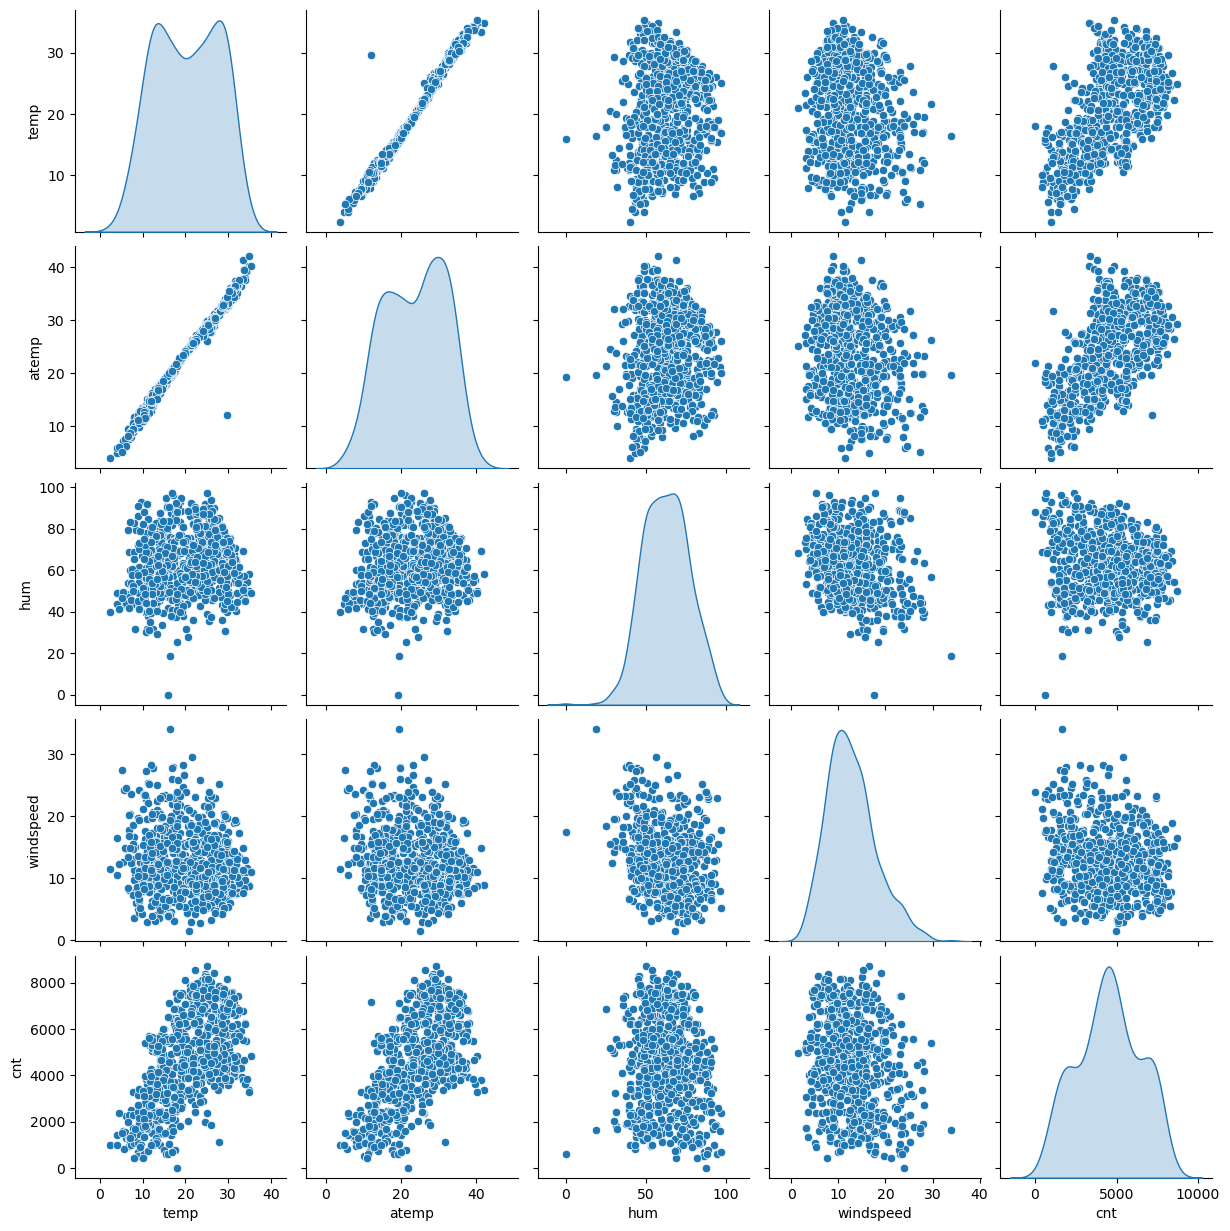

In [15]:
# visualize numeric variables
bike_num = bike_sharing[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bike_num,diag_kind='kde')
plt.show()

##### Observation:
linear relation can be observed between temp, atemp and cnt. 


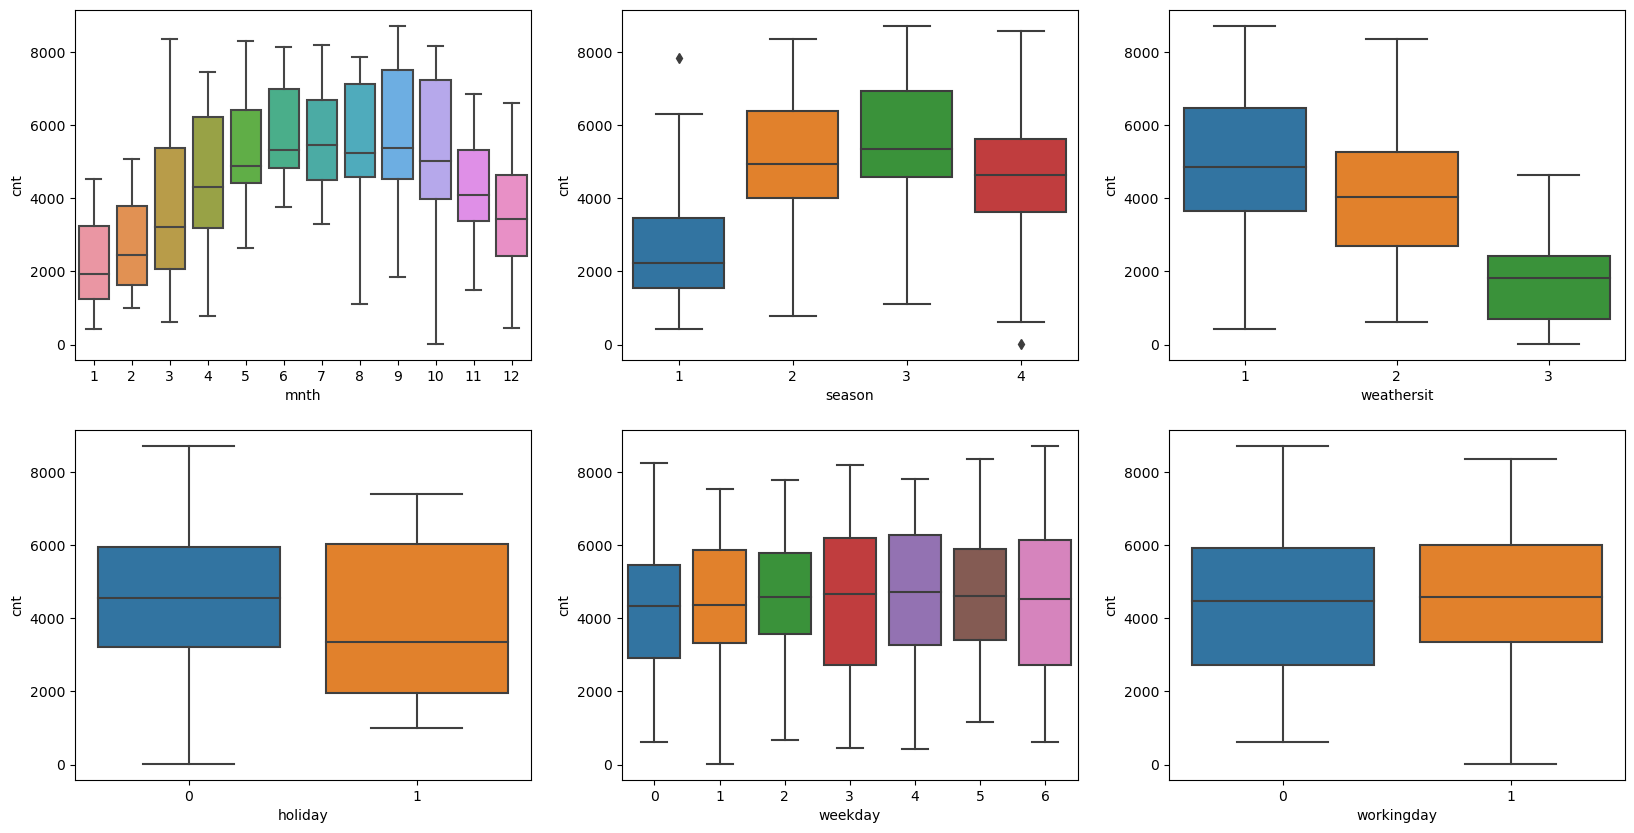

In [16]:
# visualize categorical variables

plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.show()

#### Observation:
We could observe the significance of categorical variables mnth, season, weathersit, holiday, weekday and workingday.

<b>Mnth</b> : Majority of the booking occured in the month 7,8,9. <br>
<b>season</b> Season 3 has the highest percentage of bookings.<br>
<b>weatehrsit</b> weathersit 1 has the maximum number of bookings. <br> 
<b>workingday</b> workingday is good indicator which affects the number of bookings.<br>
Therefore the above predictor variables can be considered for our Lr predictive analysis.

    

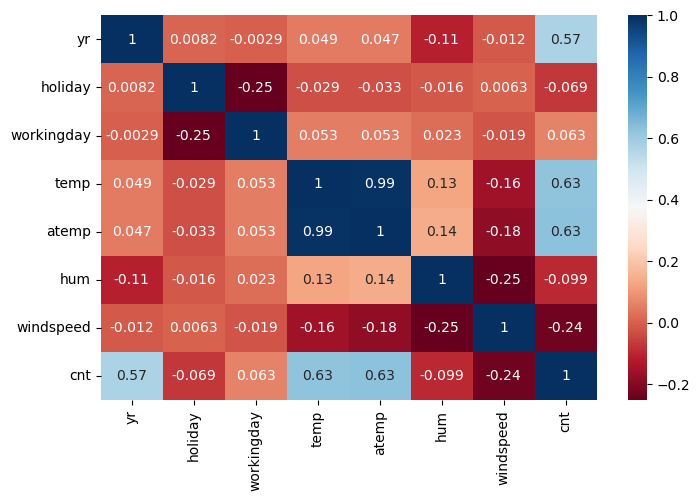

In [17]:
plt.figure(figsize = (8,5))
sns.heatmap(bike_sharing.corr(), annot = True, cmap="RdBu")
plt.show()

##### observation:
The above correlation matrix shows high correlation between temp,atemp,yr and cnt.

## Data preparation step

1. Creating dummy variables for categorical variable type using pandas

2. Train-test split using scikit learn


In [18]:
bike_sharing.shape

(730, 12)

In [19]:
# using pandas get_dummies method to create dummy variables , for the all column dtypes as category , dummy variables will be created 
bike_sharing = pd.get_dummies(bike_sharing, drop_first=True)
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [20]:
  bike_sharing.shape

(730, 30)

In [21]:
# train test split using scikit learn
df_train, df_test = train_test_split(bike_sharing, train_size = 0.70, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [22]:
# Rescaling the numeric variables in the tarin dataset` using minmax scaler
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [23]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,1,0


In [24]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# X_train , y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [26]:
# implementing RFe , considering the number of variables as 15 (15 was the initial number of column count so considering this)
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(estimator = lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [28]:
# list of RFe selected  
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [30]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [31]:
# VIF calculation using statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,temp,24.07
4,hum,17.44
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.46
8,season_4,2.85
13,weathersit_2,2.15
0,yr,2.04
12,weekday_6,1.91


In [32]:
# linear regression using stats model,
import statsmodels.api as sm

# Adding a constant as per the lr stats model requirement
X_train_lm_1 = sm.add_constant(X_train_rfe)

# first model
lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

In [33]:
# model 1 params
lr_1.params

const           0.195221
yr              0.230148
holiday        -0.054466
workingday      0.044468
temp            0.497208
hum            -0.163900
windspeed      -0.182540
season_2        0.118324
season_3        0.029169
season_4        0.143004
mnth_8          0.047286
mnth_9          0.117613
mnth_10         0.041624
weekday_6       0.053083
weathersit_2   -0.057693
weathersit_3   -0.250689
dtype: float64

In [34]:
# model 1 sumamry
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          5.17e-191
Time:                        10:41:32   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1952      0.029      6.790   

#### Model 1
R2 : 0.848 <br>
Adj. R-squared: 0.843 <br>
'season_3' has a high p value , therefore considering to remove the column in model 2. 


In [35]:
# model 2 removing season_3
X_train_m2 = X_train_rfe.drop(["season_3"], axis = 1)

In [36]:
#VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_m2.columns
vif['VIF'] = [variance_inflation_factor(X_train_m2.values, i) for i in range(X_train_m2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
4,hum,16.57
3,temp,10.01
2,workingday,5.05
5,windspeed,3.83
7,season_4,2.25
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.84
10,mnth_10,1.61


In [37]:
import statsmodels.api as sm

# Adding a constant
X_train_lm_2 = sm.add_constant(X_train_m2)

# second model
lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

In [38]:
# model 1 params
lr_2.params

const           0.194758
yr              0.229241
holiday        -0.055677
workingday      0.044188
temp            0.530905
hum            -0.170764
windspeed      -0.185795
season_2        0.104917
season_4        0.134863
mnth_8          0.055722
mnth_9          0.125195
mnth_10         0.038505
weekday_6       0.052702
weathersit_2   -0.056753
weathersit_3   -0.246985
dtype: float64

In [39]:
# model 2 sumamry
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          8.70e-192
Time:                        10:41:32   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1948      0.029      6.769   

#### Model 2
R2 : 0.848 <br>
Adj. R-squared: 0.843 <br>
'season_3' has been removed , 'hum' has a high VIF score ,considering to remove the column in model 3. 

In [40]:
# model 3 removing "hum"
X_train_m3 = X_train_m2.drop(["hum"], axis = 1)

In [41]:
#VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_m3.columns
vif['VIF'] = [variance_inflation_factor(X_train_m3.values, i) for i in range(X_train_m3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,temp,6.39
2,workingday,4.40
4,windspeed,3.60
0,yr,2.02
6,season_4,2.00
5,season_2,1.83
10,weekday_6,1.77
9,mnth_10,1.60
7,mnth_8,1.59
11,weathersit_2,1.55


In [42]:
import statsmodels.api as sm

# Adding a constant
X_train_lm_3 = sm.add_constant(X_train_m3)

# Third model
lr_3 = sm.OLS(y_train, X_train_lm_3).fit()

In [43]:
# model 3 params
lr_3.params

const           0.093743
yr              0.233082
holiday        -0.054099
workingday      0.047315
temp            0.510620
windspeed      -0.152990
season_2        0.101899
season_4        0.126666
mnth_8          0.053932
mnth_9          0.118514
mnth_10         0.034306
weekday_6       0.057825
weathersit_2   -0.083999
weathersit_3   -0.292947
dtype: float64

In [44]:
# model 3 sumamry
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          1.97e-188
Time:                        10:41:32   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0937      0.019      4.914   

#### Model 3
R2 : 0.841 <br>
Adj. R-squared: 0.837 <br>
After removing 'hum' all the other VIF scores have significantly reduced.

In [45]:
# removing mnth_10 based on the p value
# model 4 removing "mnth_10"
X_train_m4 = X_train_m3.drop(["mnth_10"], axis = 1)

In [46]:
#VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_m4.columns
vif['VIF'] = [variance_inflation_factor(X_train_m4.values, i) for i in range(X_train_m4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.76
7,mnth_8,1.58
10,weathersit_2,1.54
6,season_4,1.52
8,mnth_9,1.31


In [47]:
import statsmodels.api as sm

# Adding a constant
X_train_lm_4 = sm.add_constant(X_train_m4)

# 4th model
lr_4 = sm.OLS(y_train, X_train_lm_4).fit()

In [48]:
# model 4 params
lr_4.params

const           0.090297
yr              0.232711
holiday        -0.056011
workingday      0.046317
temp            0.518828
windspeed      -0.150835
season_2        0.100362
season_4        0.138202
mnth_8          0.050952
mnth_9          0.113626
weekday_6       0.056927
weathersit_2   -0.083049
weathersit_3   -0.287225
dtype: float64

In [49]:
# model 4 sumamry
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          8.64e-189
Time:                        10:41:32   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0903      0.019      4.740   

In [50]:
# removing mnth_8 based on the p value
# model 5 removing "mnth_8"
X_train_m5 = X_train_m4.drop(["mnth_8"], axis = 1)

In [51]:
#VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_m5.columns
vif['VIF'] = [variance_inflation_factor(X_train_m5.values, i) for i in range(X_train_m5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,4.84
2,workingday,4.35
4,windspeed,3.55
0,yr,2.02
8,weekday_6,1.76
5,season_2,1.57
9,weathersit_2,1.53
6,season_4,1.41
7,mnth_9,1.21
1,holiday,1.12


In [52]:
import statsmodels.api as sm

# Adding a constant
X_train_lm_5 = sm.add_constant(X_train_m5)

# 5th model
lr_5 = sm.OLS(y_train, X_train_lm_5).fit()

In [53]:
# model 5 params
lr_5.params

const           0.084514
yr              0.233003
holiday        -0.056709
workingday      0.047717
temp            0.547700
windspeed      -0.154226
season_2        0.088003
season_4        0.130958
mnth_9          0.099363
weekday_6       0.058986
weathersit_2   -0.080511
weathersit_3   -0.288352
dtype: float64

In [54]:
# model 5 sumamry
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.9
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          6.43e-188
Time:                        10:41:32   Log-Likelihood:                 500.92
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     498   BIC:                            -927.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0845      0.019      4.420   

In [55]:
#removing holiday which has high p value
# removing holiday based on the p value
# model 6 removing "holiday"
X_train_m6 = X_train_m5.drop(["holiday"], axis = 1)


In [56]:
#VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_m6.columns
vif['VIF'] = [variance_inflation_factor(X_train_m6.values, i) for i in range(X_train_m6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,weekday_6,1.69
4,season_2,1.57
8,weathersit_2,1.53
5,season_4,1.40
6,mnth_9,1.20
9,weathersit_3,1.08


In [57]:
import statsmodels.api as sm

# Adding a constant
X_train_lm_6 = sm.add_constant(X_train_m6)

# 6th model
lr_6 = sm.OLS(y_train, X_train_lm_6).fit()

In [58]:
# model 6 params
lr_6.params

const           0.075009
yr              0.233139
workingday      0.056117
temp            0.549892
windspeed      -0.155203
season_2        0.088621
season_4        0.130655
mnth_9          0.097365
weekday_6       0.067500
weathersit_2   -0.080022
weathersit_3   -0.287090
dtype: float64

In [59]:
# model 6 sumamry
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Fri, 10 Nov 2023   Prob (F-statistic):          3.13e-188
Time:                        10:41:32   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0750      0.019      4.031   

### Final Model
#### Model 6
R2 : 0.835 <br>
Adj. R-squared: 0.832 <br>
After removing 'mnth_8', 'mnth_10, 'holiday' which had high p values.
VIF scores of all the predictors are < 5 and pvalues approx equal to 0


### Residual analysis
Valiating the linear regression assumption, error terms should be normally ditributed with mean =0 

In [71]:
y_train_pred = lr_6.predict(X_train_lm_6)


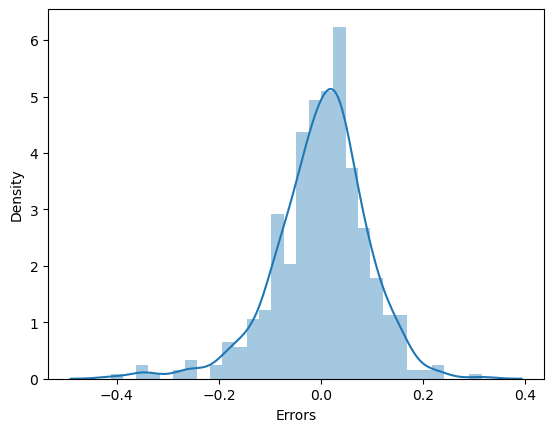

In [75]:
error_term = y_train - y_train_pred
sns.distplot(error_term)
plt.xlabel('Errors')
plt.show()

From the above distribution plot we can observe that error terms are normally distributed with mean =0

## Predictions using the test set and final lr_6 model

In [60]:
# rescaling transforming test dataset, test dataset should only be transformed with the fit on train data
# Rescaling

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [61]:
df_test.shape

(220, 30)

In [62]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# X_test , y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
columns = X_train_m6.columns

In [65]:
# selecting the columns required by the final model lr_6
X_test=X_test[columns]
X_test.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [66]:
# Adding constant to test data
X_test = sm.add_constant(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   mnth_9        220 non-null    uint8  
 8   weekday_6     220 non-null    uint8  
 9   weathersit_2  220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [67]:
# prediction using lr_6 model
y_test_pred = lr_6.predict(X_test)

### Model evaluation, calculating r2 score for test data set prediction


In [68]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_test_pred)
print(r2)

0.7961390438459764


In [69]:
# n number of observations
n = X_test.shape[0]
# p number of independent presictors
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.785357935587831

#### R2 score 
For the final model lr_6 is 0.80 and adjusted r2 score is 0.79. Therefore we can conclude that the model generalized the prediction well for the all the unseen test data.